In [35]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<AxesSubplot:>

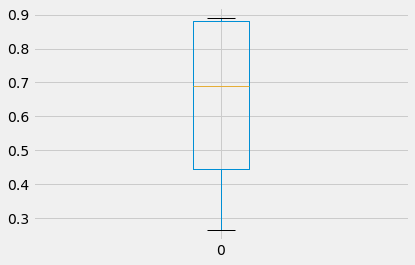

In [62]:
from numpy import random 
# generate 5 rows, 20 columns 
df1 = pd.DataFrame(np.random.random(size=(5,1)))
df1['type'] = ['a']*5
df2 = pd.DataFrame(np.random.random(size=(5,1)))
df2['type'] = ['b']*5
df3 = pd.DataFrame(np.random.random(size=(5,1)))
df3['type'] = ['c']*5
df4 = pd.DataFrame(np.random.random(size=(5,1)))
df4['type'] = ['d']*5
df = pd.concat([df1, df2, df3, df4])
# plt.figure() 
# Boxplot by 5 rows
# df.T.boxplot() 
# median(axis=1)  gives row-wise medians
# argsort()  gives the row indexes that correspond to the
# smallest, next-smallest... up to largest values of its argument.
rowindexes = np.argsort( pd.pivot_table(df, columns=["type"], aggfunc=np.median)).iloc[0,:]
sorteddf = df.iloc[rowindexes,:] 
# plt.figure() 
sorteddf.boxplot()#.T#.boxplot()

In [95]:
rowindexes_rr = pd.DataFrame(np.argsort(pd.pivot_table(mm, columns=["region"], aggfunc = np.mean)).iloc[0,:].sort_values()).reset_index()
# rr_sorted = mm.iloc[rowindexes_rr,:]
rr_sorted#.boxplot(by = 'region', column = 'stateresponse_sum', figsize = [7,5], rot = 45)

rr_regions, rr_stateresponses = [], []
for r in rowindexes_rr.region:
    re = r
    rmm = mm.query('region == @re')
    rr_regions.append(rmm.region)
    rr_stateresponses.append(rmm.stateresponse_sum)

In [ ]:
# s = mm.sort_values('mean_regionresponse')
mm.boxplot(by = 'region', column = 'stateresponse_sum', figsize = [7,5], rot = 45)
plt.xlabel('Region')
plt.ylabel('State Response\n(quantified sum)')
plt.title('')
# plt.savefig("stateresponse_region", dpi=400, bbox_inches = 'tight')-

In [ ]:

# rr_means = {} #rr for region_response
# for r in mm.region.unique():
#     re = r
#     rr_means[re] = rr_means.get(re, mm.query('region == @re').stateresponse_sum.mean())
    
# # mean_regionresponse = []
# # for i in range(len(mm)):
# #     mean_regionresponse.append(rr_means[mm.region[i]])
# # mm['mean_regionresponse'] = mean_regionresponse

# rr_order = {}
# rr_sorted = mm.sort_values('mean_regionresponse').region.unique()
# for i in range(len(mm.region.unique())):
#     reg = rr_sorted[i]
#     rr_order[reg] = rr_order.get(reg, i)
# [r + ": " + str(rr_order[r]) for r in mm.region.unique()]

# s = mm.sort_values('mean_regionresponse')

In [57]:
def matprint(matrix):
    print('\n'.join([''.join([' :{}'.format(x) for x in row])for row in matrix]))
def count_col(matrix):
    nitem = 0
    nrow = 0
    for row in matrix:
        nrow += 1
        for x in row:
            nitem += 1
    return nitem / nrow
def rank(matrix):
    return count_col(la.orth(A))

In [71]:
nrow = 5
ncol = 7
A = np.vstack([np.random.random((nrow,ncol))])
print("|AA.T|: " + str(la.det(np.matmul(A,A.T))) + "\n|A.TA|: " + str(la.det(np.matmul(A.T,A))) \
      + "\nrank(AA.T): " + str(rank(np.matmul(A,A.T))) + "\nrank(A.TA): " + str(rank(np.matmul(A.T,A))))

|AA.T|: 0.397586412133157
|A.TA|: -3.1584613372140407e-32
rank(AA.T): 5.0
rank(A.TA): 5.0


In [74]:
nrow = 5
ncol = 8
A = np.vstack([np.random.random((nrow,ncol))])
print("|AA.T|: " + str(la.det(np.matmul(A,A.T))) + "\n|A.TA|: " + str(la.det(np.matmul(A.T,A))) \
      + "\nrank(AA.T): " + str(rank(np.matmul(A,A.T))) + "\nrank(A.TA): " + str(rank(np.matmul(A.T,A))))

|AA.T|: 0.27748464091428515
|A.TA|: 4.857596929020707e-49
rank(AA.T): 5.0
rank(A.TA): 5.0


In [73]:
nrow = 3
ncol = 5
A = np.vstack([np.random.random((nrow,ncol))])
print("|AA.T|: " + str(la.det(np.matmul(A,A.T))) + "\n|A.TA|: " + str(la.det(np.matmul(A.T,A))) \
      + "\nrank(AA.T): " + str(rank(np.matmul(A,A.T))) + "\nrank(A.TA): " + str(rank(np.matmul(A.T,A))))

|AA.T|: 0.3549875094923233
|A.TA|: -2.845370008372813e-35
rank(AA.T): 3.0
rank(A.TA): 3.0


In [49]:
matprint(la.null_space(A))

 :-0.12135881322533218 :0.2241705483382047
 :-0.6515118173903957 :0.3488569817098038
 :-0.28047212036780744 :-0.13476850537218948
 :0.6652005567308217 :0.37331108753123254
 :0.007478895722501647 :-0.7722379822162417
 :0.1261964344370975 :0.10261074412545851
 :-0.1538392840880663 :0.2522740324898222


In [17]:
A = np.vstack([np.random.random((4,4))])
B = np.vstack([np.random.random((4,4))])
three = np.vstack([np.random.random((3,3))])

In [32]:
np.allclose(la.det(-A), -la.det(A)), np.allclose(la.det(-three), -la.det(three)) #a

(False, True)

In [25]:
np.allclose(la.det(2*A), 2*la.det(A)) #b

False

In [26]:
np.allclose(la.det(A+B), la.det(A) + la.det(B)) #c

False

In [27]:
np.allclose(la.det(np.matmul(A,B)), la.det(A) * la.det(B)) #d

True

In [28]:
np.allclose(la.det(A.T), la.det(A)) #e

True

In [33]:
np.allclose(la.det(la.inv(A)), 1 / la.det(A))

True

In [13]:
L = np.vstack([[1,0,0],[-1,1,0],[2,-5,1]])
U = np.vstack([[3,-7,-2],[0,-2,-1],[0,0,-1]])
L, U
b = np.vstack([[-7,5,2]]).T
b, L, U

(array([[-7],
        [ 5],
        [ 2]]),
 array([[ 1,  0,  0],
        [-1,  1,  0],
        [ 2, -5,  1]]),
 array([[ 3, -7, -2],
        [ 0, -2, -1],
        [ 0,  0, -1]]))

In [15]:
y = la.solve(L, b)
y

array([[-7.],
       [-2.],
       [ 6.]])

In [16]:
la.solve(U,y)

array([[ 3.],
       [ 4.],
       [-6.]])

## part a

In [6]:
a = np.vstack([np.random.random(4),np.random.random(4),np.random.random(4),np.random.random(4)])
i = np.vstack([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
a, i

(array([[0.74572671, 0.36385292, 0.60837197, 0.01753076],
        [0.83440467, 0.95774117, 0.87786589, 0.36561401],
        [0.83641219, 0.76811082, 0.58979954, 0.28415914],
        [0.37514064, 0.95161899, 0.7885801 , 0.99223912]]),
 array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]]))

In [40]:
np.matmul(a,i)

array([[0.91858309, 0.85535885, 0.45013663, 0.40929881],
       [0.19584703, 0.71434344, 0.73783854, 0.92895862],
       [0.43369449, 0.46544517, 0.10048915, 0.45180457],
       [0.0817876 , 0.63598596, 0.24494043, 0.86610678]])

In [41]:
answera = np.matmul((a+i),(a-i)) - (np.matmul(a,a) - np.matmul(i,i))

In [42]:
np.allclose(0, answera)

True

## part b

In [43]:
a = np.vstack([np.random.random(4),np.random.random(4),np.random.random(4),np.random.random(4)])
b = np.vstack([np.random.random(4),np.random.random(4),np.random.random(4),np.random.random(4)])
a, b

(array([[0.11053876, 0.9830145 , 0.2336152 , 0.29568161],
        [0.43287815, 0.00555091, 0.48073561, 0.53272754],
        [0.61065012, 0.08104899, 0.83994957, 0.52141354],
        [0.84038392, 0.07785855, 0.50471389, 0.39564218]]),
 array([[0.28185188, 0.9699282 , 0.70226921, 0.65571762],
        [0.51800419, 0.88033289, 0.95018022, 0.77501328],
        [0.02680574, 0.05417272, 0.074933  , 0.28976234],
        [0.95655463, 0.26661436, 0.41614075, 0.23851162]]))

In [44]:
leftb = np.matmul((a+b),(a-b))
rightb = np.matmul(a,a) - np.matmul(b,b)
leftb, rightb

(array([[ 0.20241818, -1.85769319, -0.30045835, -0.24815229],
        [ 0.44520058, -0.97089764,  0.34899686, -0.02002948],
        [ 0.31919873, -0.2384731 ,  0.40952339,  0.07712481],
        [ 0.12680294, -0.37277448, -0.24321533, -0.41746143]]),
 array([[-0.39903439, -1.1840299 , -0.60118322, -0.5012525 ],
        [-0.57731981, -1.02951954, -0.81750365, -0.8897275 ],
        [ 0.73888862,  0.55439759,  0.95380467,  0.71760329],
        [ 0.12027476, -0.35038035, -0.19815146, -0.30166824]]))

In [45]:
np.allclose(leftb,rightb)

False

## part c

In [46]:
leftc = np.matmul(a,b).T
rightc = np.matmul(a.T,b.T)
leftc, rightc

(array([[0.82945903, 0.64735239, 0.73537261, 0.66917744],
        [1.06408319, 0.59282294, 0.84815555, 1.01647911],
        [1.15221956, 0.56698396, 0.78577329, 0.86661796],
        [0.9725479 , 0.55450865, 0.83097703, 0.85200829]]),
 array([[1.4309116 , 1.66987278, 0.31568272, 0.67570562],
        [0.39041991, 0.65144484, 0.05528486, 0.99408498],
        [1.45294443, 1.73348447, 0.24149201, 0.82155409],
        [1.22564811, 1.42420667, 0.19049855, 0.7362151 ]]))

In [47]:
np.allclose(leftc, rightc)

False

In [58]:
a = np.vstack([[5,7],[-3,-6]])
i = np.vstack([[1,0],[0,1]])
a, i

(array([[ 5,  7],
        [-3, -6]]),
 array([[1, 0],
        [0, 1]]))

In [59]:
np.linalg.solve(a,i)

array([[ 0.66666667,  0.77777778],
       [-0.33333333, -0.55555556]])

In [63]:
b = np.vstack([[-4,6],[6,-9]])
b

array([[-4,  6],
       [ 6, -9]])

In [64]:
np.linalg.solve(b,i)

array([[4.50359963e+15, 3.00239975e+15],
       [3.00239975e+15, 2.00159983e+15]])

## part d

In [55]:
leftd = np.linalg.inv(np.matmul(a,b))
rightd = np.matmul(np.linalg.inv(b),np.linalg.inv(a))
leftd, rightd

(array([[-0.90980392,  5.86214468, -2.20175955, -0.62930187],
        [-2.58955294,  3.505789  , -6.92453266,  7.42786381],
        [ 4.97293879, -0.29039822, -3.20081162, -2.36569518],
        [-1.25420299, -8.49136328, 13.24622255, -4.78751194]]),
 array([[-0.90980392,  5.86214468, -2.20175955, -0.62930187],
        [-2.58955294,  3.505789  , -6.92453266,  7.42786381],
        [ 4.97293879, -0.29039822, -3.20081162, -2.36569518],
        [-1.25420299, -8.49136328, 13.24622255, -4.78751194]]))

In [56]:
np.allclose(leftd,rightd)

True